In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [2]:
# Assuming the file is named 'car_data.csv'
df = pd.read_csv('all_car_data.csv')
df.head()


,Brand,Car Name,Price,Rating,Safety,Mileage,Power (BHP)
0,Maruti Suzuki,Maruti Brezza,Rs. 8.69 Lakh,4.5/5,4 Star Safety,17-25 kmpl,87-102 bhp
1,Maruti Suzuki,Maruti Fronx,Rs. 7.54 Lakh,4.5/5,4 Star Safety,20-28 kmpl,76-99 bhp
2,Maruti Suzuki,Maruti Swift,Rs. 6.49 Lakh,4.5/5,4 Star Safety,24-32 kmpl,69-80 bhp
3,Maruti Suzuki,Maruti Dzire,Rs. 6.84 Lakh,4.7/5,5 Star Safety,24-33 kmpl,69-80 bhp
4,Maruti Suzuki,Maruti Baleno,Rs. 6.70 Lakh,4.5/5,4 Star Safety,22-30 kmpl,76-88 bhp


In [5]:
import re

def convert_price(price):
    try:
        price = price.replace('Rs.', '').replace(',', '').strip()
        if 'Lakh' in price:
            return float(price.replace('Lakh', '').strip()) * 1e5
        elif 'Crore' in price:
            return float(price.replace('Crore', '').strip()) * 1e7
        else:
            return float(price)
    except:
        return None

df['Price_Clean'] = df['Price'].apply(convert_price)


In [6]:
# Example for 'Power (BHP)' column like '110 bhp'
df['Power_Clean'] = df['Power (BHP)'].str.extract(r'(\d+\.?\d*)').astype(float)

# Example for 'Mileage' column like '15.5 kmpl'
df['Mileage_Clean'] = df['Mileage'].str.extract(r'(\d+\.?\d*)').astype(float)

# Optional: Clean Rating if it is not already float
df['Rating_Clean'] = pd.to_numeric(df['Rating'], errors='coerce')


In [7]:
# Now use the clean columns
brand_summary = df.groupby('Brand')[['Price_Clean', 'Rating_Clean', 'Mileage_Clean', 'Power_Clean']].mean().reset_index()
brand_summary


,Brand,Price_Clean,Rating_Clean,Mileage_Clean,Power_Clean
0,Aston Martin,5.340000e+07,NaN,16.500000,637.500000
1,Audi,9.101250e+06,NaN,19.666667,221.833333
2,BMW,1.181900e+07,NaN,18.550000,288.200000
3,BYD,3.829667e+06,NaN,24.000000,76.000000
4,Bentley,4.100000e+07,NaN,7.000000,542.000000
5,Citroen,1.520000e+06,NaN,18.800000,98.000000
6,Ferrari,5.604000e+07,NaN,14.200000,658.400000
7,Force Motors,1.529000e+06,NaN,24.000000,114.000000
8,Honda,1.221200e+06,NaN,19.000000,100.600000
9,Hyundai,1.451857e+06,NaN,22.285714,100.571429


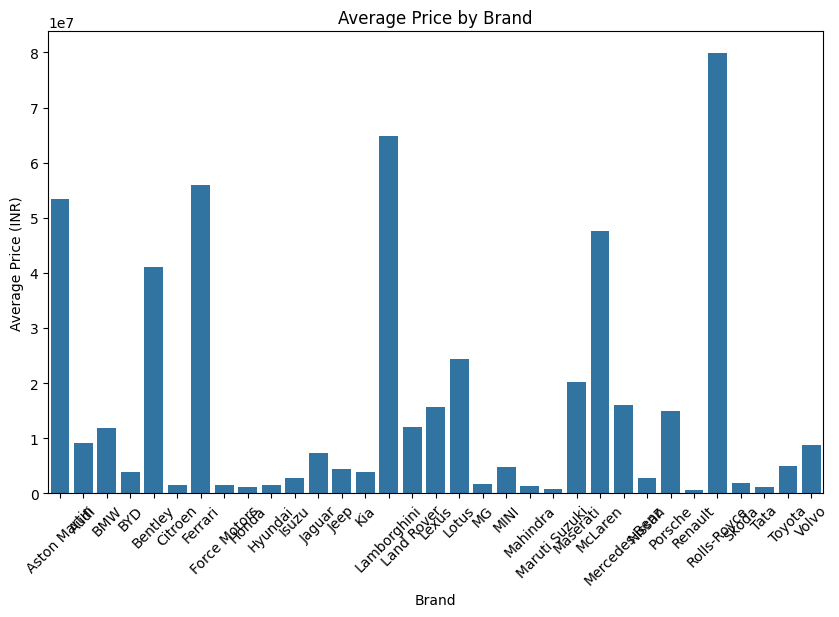

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=brand_summary, x='Brand', y='Price_Clean')
plt.xticks(rotation=45)
plt.title('Average Price by Brand')
plt.ylabel('Average Price (INR)')
plt.show()


In [9]:
df.drop(columns=['Price', 'Power (BHP)', 'Mileage', 'Rating'], inplace=True)


In [10]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()
